# AIRDOS Clibration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt

In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [12]:
#fto = glob.iglob("./data/*.TXT") # generator, search immediate subdirectories 

#fto = './data/AIRDOS/RUN00/F1.TXT' #  File to Open
#fto = './data/AIRDOS/RUN01_03/F1.TXT' #  File to Open
#fto = './data/AIRDOS/RUN04_23/F1.TXT' #  File to Open
fto = './data/DATALOG.TXT' #  File to Open

print fto

l=[]
#l.extend(range(0,261))
l.extend(range(0,258))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$STROKE'].index, inplace=True)
df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

./data/DATALOG.TXT


In [72]:

#df.loc[df[0]=='$CANDY']
#df
#xx.iloc[:20,0:20]
#rc['sum'].plot()
#plt.ylim([0,300])
#rc.loc[rc[257]<=10]
#rc[range(7,255)]


## Calculate Flux

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: 
.ix is deprec

2800


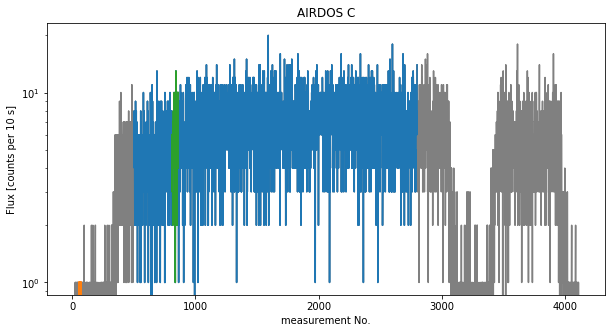

In [6]:
rc = df.loc[df[0]=='$CANDY']
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#rc = rc.loc[rc[257]<=255]
#rc=df
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

rc['sum'] = rc[range(8,255)].sum(axis=1)

plt.figure(figsize=(10,5))

#rc['sum'].plot()
rc.ix[0:,'sum'].plot(c='gray')
plt.yscale('log')

#plt.ylim([0,50])

'''
#musala kalibrce
e1 = [10,41]
e2 = [43,55]
e3 = [66,90]
e4 = [91,113]
e5 = [116,123]
e6 = [125,134]
e7 = [143,170]
bn=189
e8 = [bn+2,bn+18]
e9 = [bn+24,bn+54]
e10 = [bn+59,bn+74]
e11 = [bn+120,bn+141]
e12 = [540,630]
e13 = [700,850]
#'''

'''
#musala kalibrce
e1 = [20,80]
e2 = [100,190]
e3 = [220,320]
e4 = [330,400]
e5 = [450,600]
e6 = [650,900]
e7 = [980,1100]
e8 = [1400,1550]
e9 = [1600,1750]
#'''

e1 = [500,2800]
e2 = [50,70]
e3 = [810,860]
e4 = [1,1]

rc.ix[e1[0]:e1[1],'sum'].plot()
rc.ix[e2[0]:e2[1],'sum'].plot()
rc.ix[e3[0]:e3[1],'sum'].plot()
rc.ix[e4[0]:e4[1],'sum'].plot()
#rc.ix[e5[0]:e5[1],'sum'].plot()
#rc.ix[e6[0]:e6[1],'sum'].plot()
#rc.ix[e7[0]:e7[1],'sum'].plot()
#rc.ix[e8[0]:e8[1],'sum'].plot()
#rc.ix[e9[0]:e9[1],'sum'].plot()
#rc.ix[e10[0]:e10[1],'sum'].plot()
#rc.ix[e11[0]:e11[1],'sum'].plot()
#rc.ix[e12[0]:e12[1],'sum'].plot()
#rc.ix[e13[0]:e13[1],'sum'].plot()

plt.title('AIRDOS C')
#plt.title('AIRDOS A005')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')
#plt.xlim([12500,14000])
#plt.ylim([0,4000])

print e1[1]

## Energy spectrum

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: 

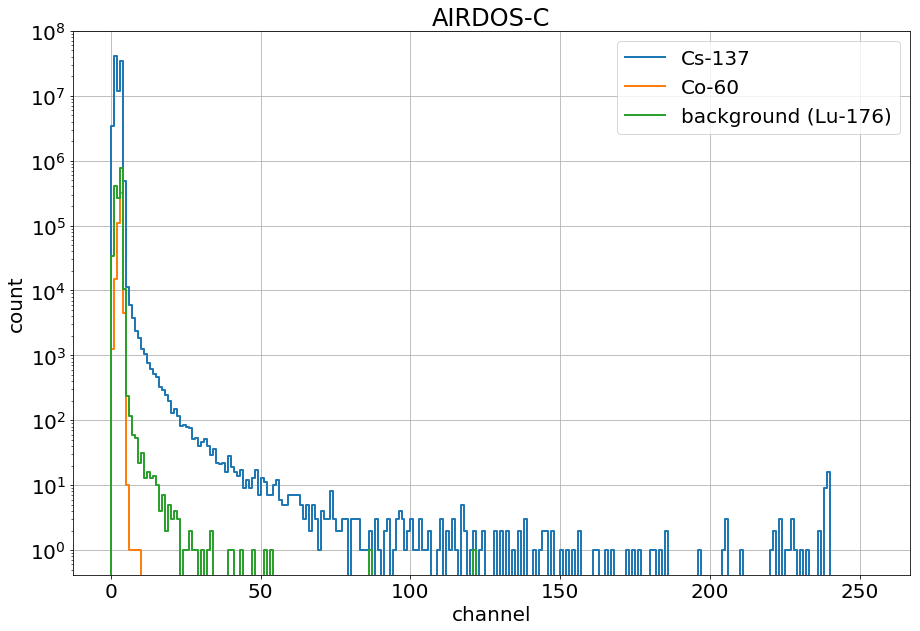

In [7]:
matplotlib.rcParams.update({'font.size': 20})

'''
plt.figure(figsize=(20,5))
rc['sum'][91:154].plot(c='blue')
rc['sum'][155:235].plot(c'red')
rc['sum'][236:296].plot(c='green')
rc['sum'][300:350].plot(c='yellow')
'''

LOW_ENERGY = 0

ener1 = rc.ix[e1[0]:e1[1],LOW_ENERGY:255].sum()
ener2 = rc.ix[e2[0]:e2[1],LOW_ENERGY:255].sum()
ener3 = rc.ix[e3[0]:e3[1],LOW_ENERGY:255].sum()
ener4 = rc.ix[e4[0]:e4[1],LOW_ENERGY:255].sum()
#ener5 = rc.ix[e5[0]:e5[1],LOW_ENERGY:255].sum()
#ener6 = rc.ix[e6[0]:e6[1],LOW_ENERGY:255].sum()
#ener7 = rc.ix[e7[0]:e7[1],LOW_ENERGY:255].sum()
#ener8 = rc.ix[e8[0]:e8[1],LOW_ENERGY:255].sum()
#ener9 = rc.ix[e9[0]:e9[1],LOW_ENERGY:255].sum()
#ener10 = rc.ix[e10[0]:e10[1],LOW_ENERGY:255].sum()
#ener11 = rc.ix[e11[0]:e11[1],LOW_ENERGY:255].sum()
#ener12 = rc.ix[e12[0]:e12[1],LOW_ENERGY:255].sum()
#ener13 = rc.ix[e13[0]:e13[1],LOW_ENERGY:255].sum()


plt.figure(figsize=(15,10))
plt.yscale('log')

#plt.plot(ener3, label='9 V Glass', drawstyle='steps-pre')
#plt.plot(ener2, label='GVA-PRG', drawstyle='steps-pre')
#plt.plot(ener1, label='p+', drawstyle='steps-pre')
#plt.plot(ener1, label='Am-241 5.49 MeV (85 %) / 5.44 MeV (13 %)', drawstyle='steps-pre')
#plt.plot(ener2, label='Pu-239 5.16 MeV (73 %) / 5.14 (15 %) / 5.11 (12 %)', drawstyle='steps-pre')
#plt.plot(ener2, label='Cf-252 6.12 MeV (84 %) / 6.08 MeV (16 %)', drawstyle='steps-pre')
#plt.plot(ener3, label='Co-57 0.122 MeV', lw=2, drawstyle='steps-pre')
plt.plot(ener1, label='Cs-137', lw=2, drawstyle='steps-pre')
plt.plot(ener2, label='Co-60', lw=2, drawstyle='steps-pre')
plt.plot(ener3, label='background (Lu-176)', lw=2, drawstyle='steps-pre')
#plt.plot(ener1, label='e',  drawstyle='steps-pre')
#plt.plot(ener1, label='e1', lw=2, drawstyle='steps-pre')
#plt.plot(ener2, label='e2', lw=2, drawstyle='steps-pre')
#plt.plot(ener3, label='e3', lw=2, drawstyle='steps-pre')
#plt.plot(ener4, label='e4',  drawstyle='steps-pre')
#plt.plot(ener5, label='e5',  drawstyle='steps-pre')
#plt.plot(ener6, label='e6',  drawstyle='steps-pre')
#plt.plot(ener7, label='e7',  drawstyle='steps-pre')
#plt.plot(ener8, label='e8',  drawstyle='steps-pre')
#plt.plot(ener9, label='e9',  drawstyle='steps-pre')
#plt.plot(ener10, label='e10',  drawstyle='steps-pre')
#plt.plot(ener11, label='e11',  drawstyle='steps-pre')
#plt.plot(ener12, label='e12',  drawstyle='steps-pre')
#plt.plot(ener13, label='e13',  drawstyle='steps-pre')

#plt.plot(ener2*10+10, label='e2',  drawstyle='steps-pre')
#plt.plot(ener3*100+100, label='e3',  drawstyle='steps-pre')
#plt.plot(ener4*1000+1000, label='e4',  drawstyle='steps-pre')
#plt.plot(ener5*10000+10000, label='e5',  drawstyle='steps-pre')
#plt.plot(ener6*100000+100000, label='e6',  drawstyle='steps-pre')
#plt.plot(ener7*1000000+1000000, label='e7',  drawstyle='steps-pre')
#plt.plot(ener8*10000000+10000000, label='e8',  drawstyle='steps-pre')

#plt.plot(ener3*100, label='e3*100',  drawstyle='steps-pre')
#plt.plot(ener4*1000, label='e4*1000',  drawstyle='steps-pre')
#plt.plot(ener5*10000, label='e5*10000',  drawstyle='steps-pre')
#plt.plot(ener5, label='Am-241 5.49 MeV colim.',  drawstyle='steps-pre')
#plt.ylim([0,50000])
#plt.xlim([0,40])
plt.legend()
plt.title('AIRDOS-C')
#plt.title('AIRDOS T4 Alpha Spectrum')
plt.xlabel('channel')
plt.ylabel('count')
#plt.xticks(range(500,1030,10))
#plt.xticks(rotation=90)
plt.grid()

ener1.to_csv('e1.csv')
ener2.to_csv('e2.csv')
ener3.to_csv('e3.csv')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


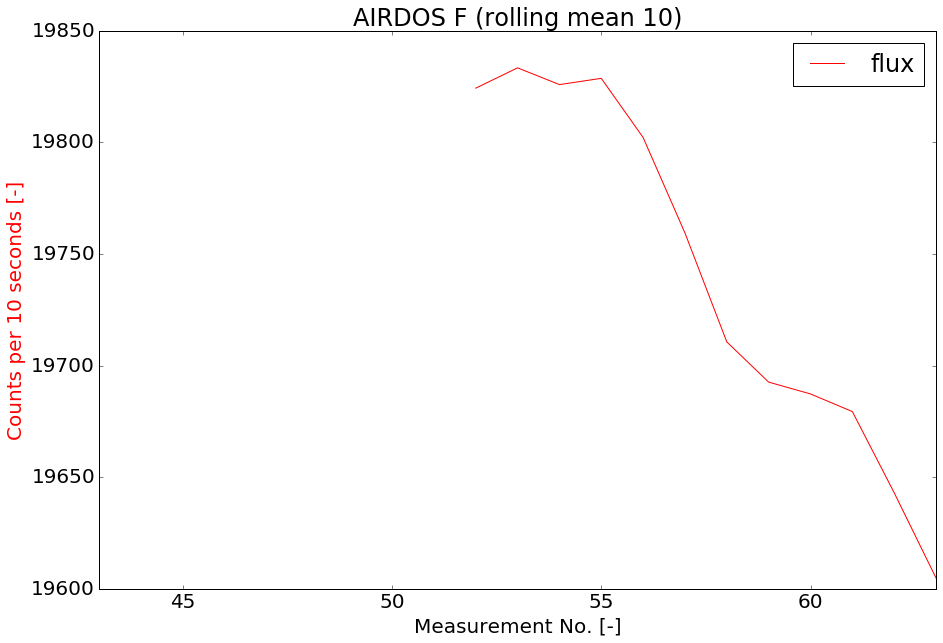

In [42]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 20})

xx = rc.ix[e2[0]:e2[1]]

WINDOW = 10
xx['sum'] = pd.rolling_mean(xx['sum'],WINDOW)

#xx.ix[:,'sum'].plot(color='r')
xx['sum'].plot(color='r', label='flux')
#plt.ylim([0,18])
plt.xlabel('Measurement No. [-]')
plt.ylabel('Counts per 10 seconds [-]', color='red')
plt.legend()
plt.title('AIRDOS F' + ' (rolling mean ' + str(WINDOW) + ')')


## Plot averaged flux in time

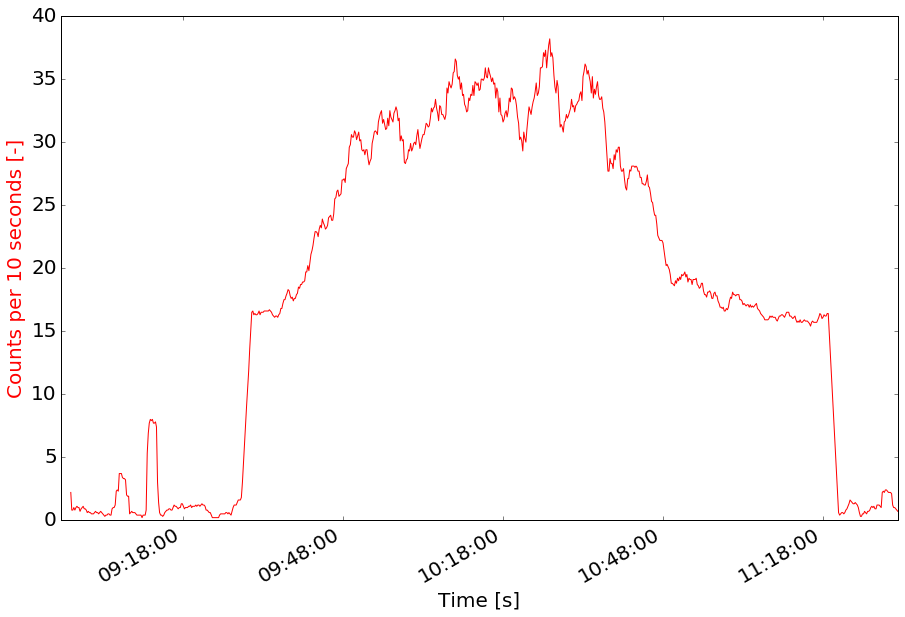

In [43]:
plt.figure(figsize=(15,10))

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['sum'] = rc[range(7,255)].sum(axis=1)

rc['time'] = pd.to_datetime(pd.to_datetime('2018-08-30 8:55') + pd.to_timedelta(rc[2], unit='s'))
rc = rc.set_index(['time'])

WINDOW = 10
rc['sum'] = pd.rolling_mean(rc['sum'],WINDOW)

rc['sum'].plot(color='r')
#plt.ylim([0,15])
plt.xlabel('Time [s]')
plt.ylabel('Counts per 10 seconds [-]', color='red')



## Plot resampled flux

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


Text(0.5,1,'AIRDOS F (sum 1 min)')

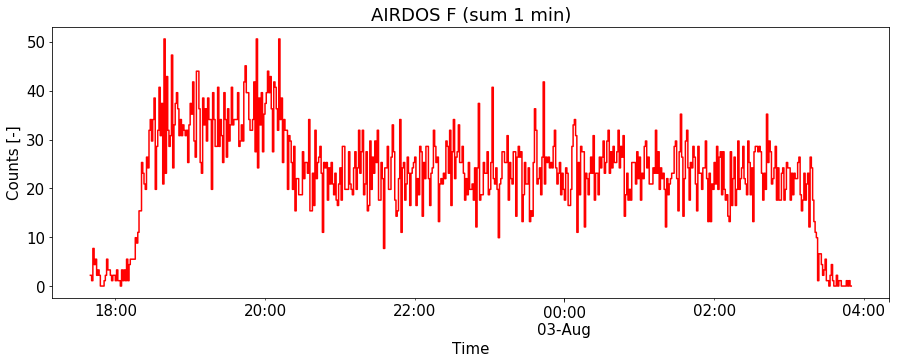

In [18]:
plt.figure(figsize=(15,5))

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['flux'] = rc[range(10,255)].sum(axis=1)

rc['time'] = pd.to_datetime(pd.to_datetime('2018-08-02 17:40') + pd.to_timedelta(rc[2], unit='s'))
#rc = rc.set_index(['time'])
rrc = pd.DataFrame()
rrc['time'] = pd.to_datetime(rc['time'])
rrc['flux'] = rc['flux']
rrc = rrc.set_index(['time'])
#rrc = rrc.loc['2018-08-02 20:00:00':'2018-08-03 14:00:00']
#rrc = rrc.loc[:'2018-08-03 13:00:00']

sample = '1 min'
method = 'sum'
rrc = rrc.resample(sample, how=method).mul(1.1) # 1.1 is fill factor (1 s for data storage from 10 s of measurement)

rrc['flux'].plot(color='r', drawstyle='steps')
#plt.ylim([0,30])
plt.xlabel('Time')
plt.ylabel('Counts [-]')
plt.title('AIRDOS F' + ' (' + method + ' ' + sample + ')')


## Plot Flux

In [19]:
fto = './data/DATALOG.TXT' #  File to Open

l=[]
l.extend(range(0,261))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

df.drop(df[df[0]=='$STROKE'].index, inplace=True)
df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)

date = np.nan #pd.to_datetime('210317000000.00', format='%d%m%y%H%M%S.%f')
altitude = np.nan
LatDD = np.nan
LonDD = np.nan
for i,r in df.iterrows():
    if (r[0] == '$GPRMC'):
        date = pd.to_datetime(str(r[9])+str(r[1]), format='%d%m%y%H%M%S.%f',errors='coerce')
        
    if (r[0] == '$GPGGA'):
        altitude = r[9]
    #r[20] = date
    #df.set_value(i,20,date)
    #df.set_value(i,21,altitude)
    df.set_value(i,'date',date)
    df.set_value(i,'altitude',altitude)
    #df.set_value(i,22,LatDD)
    #df.set_value(i,23,LonDD)

    if (r[0] == '$CANDY'):
        date = date + pd.Timedelta(seconds=11)
        df.set_value(i,'date',date)
        

dfo = df
#dfo.reset_index(inplace=True)
dfo.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [14]:
plt.figure(figsize=(30,10))
matplotlib.rcParams.update({'font.size': 15})

#dfo = pd.read_table('radiation.csv', sep=',', header=0)
dfo = dfo.dropna(how='any')
dfo['date'] = pd.to_datetime(dfo['date'])
dfo = dfo.set_index(['date'])
NOISE_LEVEL = 9
LAST_CHANNEL = 258
dfo['flux'] = dfo[range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)
#dfo[range(NOISE_LEVEL,LAST_CHANNEL)] = dfo[range(NOISE_LEVEL,LAST_CHANNEL)].mul(range(1,LAST_CHANNEL+1-NOISE_LEVEL),axis=1)
#dfo['rad'] = dfo[range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)
#xx = dfo.loc['2017-05-31 09:00:00':'2017-06-01 01:00:00']
xx = dfo
#xx = dfo
#pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)

WINDOW = 10
xx['rad'] = pd.rolling_mean(xx['rad'],WINDOW)
xx['flux'] = pd.rolling_mean(xx['flux'],WINDOW)
xx['noise'] = pd.rolling_mean(xx[NOISE_LEVEL-1],WINDOW)/10

#xx['rad'].plot(c='r', label='Doserate (rolling mean '+str(WINDOW)+')')
xx['rad'].plot(c='r')

plt.xlabel('UT')
plt.ylabel('Effective Doserate in Silicon [arbitrary unit]', color='red')
#, xticks=['2017-03-27 00:00','2017-03-27 12:00','2017-03-28 00:00','2017-03-28 12:00','2017-03-29 00:00'],figsize=(20,5))
plt.legend(loc=2)

ax = plt.twinx()
xx['altitude'].plot(c='b',label='altitude')
#plt.plot(xx[8]*100,c='tan',label='noise',zorder=10)
#plt.plot(xx[19]*5000-xx['18']*100,c='green',label='corr')
plt.ylabel('altitude [m a.s.l.]', color='blue')
#plt.ylim([0,500])
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()
plt.title('AIRDOS')

plt.figure(figsize=(30,10))
matplotlib.rcParams.update({'font.size': 15})

xx['flux'].plot(c='r')
plt.plot(xx['noise'],c='tan',label='noise/x',zorder=10)

plt.xlabel('UT')
plt.ylabel('Flux [count]', color='red')
#, xticks=['2017-03-27 00:00','2017-03-27 12:00','2017-03-28 00:00','2017-03-28 12:00','2017-03-29 00:00'],figsize=(20,5))
plt.legend(loc=2)

ax = plt.twinx()
xx['altitude'].plot(c='b',label='alt')
#plt.plot(xx[NOISE_LEVEL-1]*100,c='tan',label='noise',zorder=10)
plt.ylabel('altitude [m a.s.l.]', color='blue')
#plt.ylim([0,500])
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()
plt.title('AIRDOS')


AttributeError: 'module' object has no attribute 'rolling_mean'

<Figure size 2160x720 with 0 Axes>

In [10]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
#rc['sum'] = rc[range(21,544)].sum(axis=1)
#rc['sum']


plt.figure(figsize=(20,5))
#plt.ylim([0,200])
NOISE_LEVEL=21
xx = rc.ix[:]
NOISE_LEVEL=260
LAST_CHANNEL=516
#xx[range(NOISE_LEVEL,LAST_CHANNEL)] = xx[range(NOISE_LEVEL,LAST_CHANNEL)].mul(range(1,LAST_CHANNEL+1-NOISE_LEVEL),axis=1)
xx['rad'] = xx[range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1)

WINDOW = 30
xx['rad'] = pd.rolling_mean(xx['rad'],WINDOW)
xx['rad'].plot(c='b')

plt.title('AIRDOS')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


KeyError: '[261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278\n 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296\n 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314\n 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332\n 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350\n 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368\n 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386\n 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404\n 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422\n 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440\n 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458\n 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476\n 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494\n 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512\n 513 514 515] not in index'

<Figure size 1440x360 with 0 Axes>

In [18]:
rc.iloc[100:110,4:]

,4,5,6,7,8,9,10,11,12,13,...,249,250,251,252,253,254,255,256,257,sum
time,,,,,,,,,,,,,,,,,,,,,
2018-08-21 11:54:38,16313,4703,42,0,0,0,0,0,1,0,...,0,0,0,0,0,0,24829,2,255,0.6
2018-08-21 11:54:50,16419,4605,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,24816,2,255,0.7
2018-08-21 11:55:02,16282,4683,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,24846,1,255,0.8
2018-08-21 11:55:13,16304,4683,32,0,0,0,0,1,0,0,...,0,0,0,0,0,0,24856,1,255,0.8
2018-08-21 11:55:25,16354,4682,38,1,0,0,0,0,0,0,...,0,0,0,0,0,0,24808,0,255,0.9
2018-08-21 11:55:36,16347,4675,44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,24815,0,255,0.9
2018-08-21 11:55:48,16420,4599,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,24813,0,255,0.8
2018-08-21 11:56:00,16295,4679,44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,24865,0,255,0.8
2018-08-21 11:56:11,16367,4616,39,2,0,0,0,0,0,0,...,0,0,0,0,0,0,24840,0,255,1.0


In [112]:
#ener1[256,'x']=10
#ener1
#dfo = pd.read_table('radiation.csv', sep=',', header=0)

dfo

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,altitude,flux,rad
date,,,,,,,,,,,,,,,,,,,,,
2018-06-30 20:43:48,$CANDY,5,74,144,2940,9313,5911,854,36,0,...,0,0,0,0,0,26802,0,53.4,NaN,NaN
2018-06-30 20:43:57,$CANDY,6,86,206,3002,9195,5777,874,29,0,...,0,0,0,0,0,26917,0,54.5,NaN,NaN
2018-06-30 20:44:08,$CANDY,0,10,121,3141,9857,5584,554,16,0,...,0,0,0,0,0,26726,1,54.5,NaN,NaN
2018-06-30 21:22:51,$CANDY,1,23,87,3072,9873,5688,578,9,0,...,0,0,0,0,0,26693,0,50.1,NaN,NaN
2018-06-30 21:23:03,$CANDY,0,10,130,2954,9694,5829,618,18,2,...,0,0,0,0,0,26755,0,50.1,NaN,4.0
2018-06-30 22:03:56,$CANDY,3,49,175,2993,9129,6012,854,30,1,...,0,0,0,0,0,26804,0,39.7,NaN,4.0
2018-06-30 22:04:09,$CANDY,4,61,157,2914,8984,6179,900,31,0,...,0,0,0,0,0,26834,0,42.6,NaN,4.0
2018-06-30 22:04:22,$CANDY,5,75,171,2878,8920,6092,1004,25,0,...,0,0,0,0,0,26905,1,42.3,NaN,3.0
2018-06-30 22:04:34,$CANDY,6,88,158,3058,9201,5886,859,30,1,...,0,0,0,0,0,26803,0,42.1,3.60,3.0


In [20]:
#df.iloc[1:2,516:1026]
ener1.to_csv('prg_gva.csv')
#ener2.to_csv('Pu.csv')
#ener3.to_csv('Cf.csv')

# Spectrum Interactive

In [ ]:
%matplotlib qt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt

fto = './data/DATALOG.TXT' #  File to Open
#fto = './data/DATALOG_FRA_TRN.TXT' #  File to Open
l=[]
l.extend(range(0,520))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)


matplotlib.rcParams.update({'font.size': 20})

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(260,516)].sum(axis=1)
rc['sum'] = rc[range(260,516)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[:,'sum'].plot()

plt.title('AIRDOS')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')


points=plt.ginput(2)

plt.figure(figsize=(20,5))
rc.ix[points[0][0]:points[1][0],'sum'].plot()
points=plt.ginput(2)

#ener = rc.ix[points[0][0]:points[1][0],260:516].sum()
ener = rc.ix[points[0][0]:points[1][0],260:514].sum()

plt.figure(figsize=(20,5))

plt.plot(ener)



/usr/lib/python2.7/dist-packages/matplotlib/backend_bases.py:2437: MatplotlibDeprecationWarning:

Using default event loop until function specific to this GUI is implemented



ValueError: could not convert string to float: sum

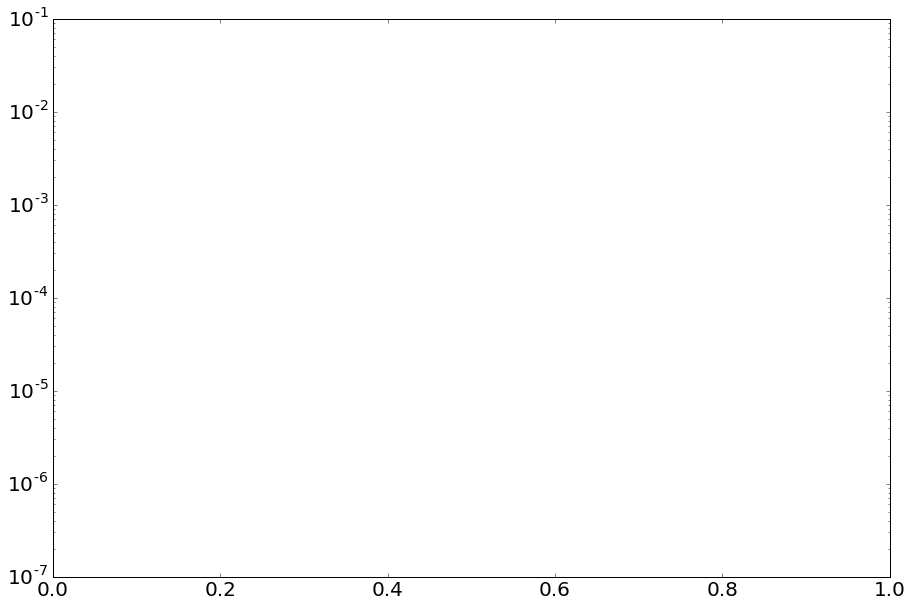

In [12]:
matplotlib.rcParams.update({'font.size': 20})

LOW_ENERGY = 256

ener1 = rc.ix[e1[0]:e1[1],LOW_ENERGY:516].sum()
ener2 = rc.ix[e2[0]:e2[1],LOW_ENERGY:516].sum()
ener3 = rc.ix[e3[0]:e3[1],LOW_ENERGY:516].sum()
ener4 = rc.ix[e4[0]:e4[1],LOW_ENERGY:516].sum()
 
plt.figure(figsize=(15,10))
plt.yscale('log')

plt.plot(ener1, label='Am-241 bez vicka', drawstyle='steps-pre')
plt.plot(ener2, label='Pu-239 s vickem', drawstyle='steps-pre')
plt.plot(ener3, label='Pu-239 bez vicka', drawstyle='steps-pre')
plt.plot(ener4, label='Am-241 s vickem',  drawstyle='steps-pre')
#plt.ylim([0,5000])
#plt.xlim([600,750])
plt.legend()
plt.title('AIRDOS Alpha Spectrum')
plt.xlabel('channel')
plt.ylabel('count')
#plt.xticks(range(500,1030,10))
plt.xticks(rotation=90)
plt.grid()


ValueError: could not convert string to float: sum

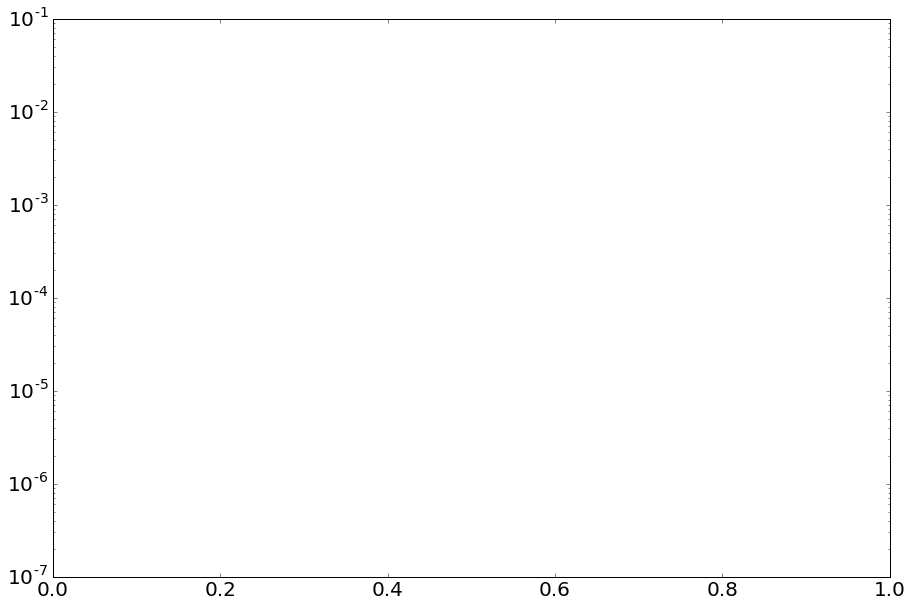

In [62]:
matplotlib.rcParams.update({'font.size': 20})

LOW_ENERGY = 256

ener1 = rc.ix[e1[0]:e1[1],LOW_ENERGY:513].sum()
ener2 = rc.ix[e2[0]:e2[1],LOW_ENERGY:513].sum()
ener3 = rc.ix[e3[0]:e3[1],LOW_ENERGY:513].sum()
ener4 = rc.ix[e4[0]:e4[1],LOW_ENERGY:513].sum()
ener5 = rc.ix[e5[0]:e5[1],LOW_ENERGY:513].sum()
 
plt.figure(figsize=(15,10))
plt.yscale('log')

plt.plot(ener1, label='3 V Am', drawstyle='steps-pre')
plt.plot(ener2, label='9 V Am', drawstyle='steps-pre')
plt.plot(ener3, label='9 V U-Glass', drawstyle='steps-pre')
#plt.plot(ener1, label='Cs-137', drawstyle='steps-pre')
#plt.plot(ener2, label='Co-60', drawstyle='steps-pre')
#plt.ylim([0,2000])
#plt.xlim([600,750])
plt.legend()
plt.title('AIRDOS T4')
#plt.title('AIRDOS T4 Alpha Spectrum')
plt.xlabel('Deposited Energy [MeV]')
plt.ylabel('count')
#plt.xticks(range(500,1030,10))
plt.xticks(rotation=90)
plt.grid()
plt.xticks([LOW_ENERGY+9, 283, 301, 320, 338,357,375,394,413,431,450,468,487], ['noise','1','2','3','4','5','6','7','8','9','10','11','12'])



In [43]:
ener1.to_csv('e1.csv')
ener2.to_csv('e2.csv')
ener3.to_csv('e3.csv')
ener4.to_csv('e4.csv')
ener5.to_csv('e5.csv')
ener6.to_csv('e6.csv')
ener7.to_csv('e7.csv')
ener8.to_csv('e8.csv')


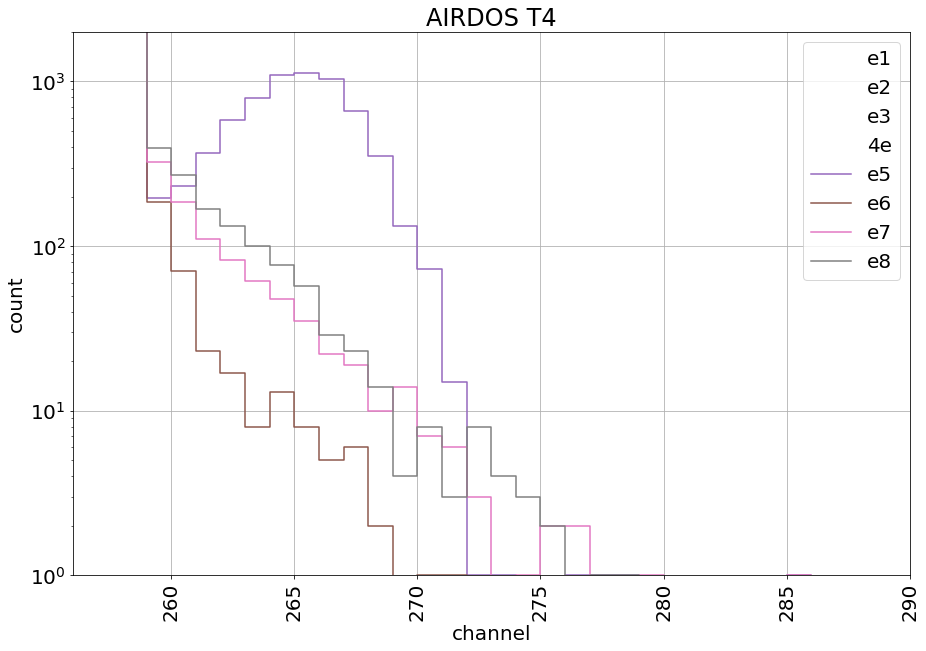

In [42]:
matplotlib.rcParams.update({'font.size': 20})

'''
plt.figure(figsize=(20,5))
rc['sum'][91:154].plot(c='blue')
rc['sum'][155:235].plot(c='red')
rc['sum'][236:296].plot(c='green')
rc['sum'][300:350].plot(c='yellow')
'''

LOW_ENERGY = 258

ener1 = rc.ix[e1[0]:e1[1],LOW_ENERGY:514].sum()
ener2 = rc.ix[e2[0]:e2[1],LOW_ENERGY:514].sum()
ener3 = rc.ix[e3[0]:e3[1],LOW_ENERGY:514].sum()
ener4 = rc.ix[e4[0]:e4[1],LOW_ENERGY:514].sum()
ener5 = rc.ix[e5[0]:e5[1],LOW_ENERGY:514].sum()
ener6 = rc.ix[e6[0]:e6[1],LOW_ENERGY:514].sum()
ener7 = rc.ix[e7[0]:e7[1],LOW_ENERGY:514].sum()
ener8 = rc.ix[e8[0]:e8[1],LOW_ENERGY:514].sum()
 
plt.figure(figsize=(15,10))
plt.yscale('log')


#plt.plot(ener3, label='9 V Glass', drawstyle='steps-pre')
#plt.plot(ener2, label='GVA-PRG', drawstyle='steps-pre')
#plt.plot(ener1, label='p+', drawstyle='steps-pre')
#plt.plot(ener2, label='9 V Am-241 5.49 MeV (85 %) / 5.44 MeV (13 %)', drawstyle='steps-pre')
#plt.plot(ener2, label='Pu-239 5.16 MeV (73 %) / 5.14 (15 %) / 5.11 (12 %)', drawstyle='steps-pre')
#plt.plot(ener3, label='Cf-252 6.12 MeV (84 %) / 6.08 MeV (16 %)', drawstyle='steps-pre')
#plt.plot(ener5, label='e5',c='purple',  drawstyle='steps-pre')
#plt.plot(ener6, label='e6',c='brown',  drawstyle='steps-pre')
#plt.plot(ener7, label='e7',c='pink',  drawstyle='steps-pre')
#plt.plot(ener8, label='e8',c='gray',  drawstyle='steps-pre')
plt.plot(ener8, label='e1', ls='', drawstyle='steps-pre')
plt.plot(ener8, label='e2', ls='',   drawstyle='steps-pre')
plt.plot(ener8, label='e3', ls='',   drawstyle='steps-pre')
plt.plot(ener8, label='4e', ls='',   drawstyle='steps-pre')
plt.plot(ener5, label='e5',  drawstyle='steps-pre')
plt.plot(ener6, label='e6',  drawstyle='steps-pre')
plt.plot(ener7, label='e7',  drawstyle='steps-pre')
plt.plot(ener8, label='e8',  drawstyle='steps-pre')

#plt.plot(ener3*100, label='e3*100',  drawstyle='steps-pre')
#plt.plot(ener4*1000, label='e4*1000',  drawstyle='steps-pre')
#plt.plot(ener5*10000, label='e5*10000',  drawstyle='steps-pre')
#plt.plot(ener5, label='Am-241 5.49 MeV colim.',  drawstyle='steps-pre')
plt.ylim([0,2000])
plt.xlim([256,290])
plt.legend()
plt.title('AIRDOS T4')
#plt.title('AIRDOS T4 Alpha Spectrum')
plt.xlabel('channel')
plt.ylabel('count')
#plt.xticks(range(500,1030,10))
plt.xticks(rotation=90)
plt.grid()


## Spectrum with plotly

In [13]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

def ener(U):
    return ((U * 1e-3 * 1e-12)/1.602e-19)*3.6/1e6

def enerT(U):
    return str(round(ener(U),3)) + ' MeV'

data = [
    go.Scatter(
        x=ener1.index,
        y=ener1,
        name=enerT(70),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener2,
        name=enerT(35),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener3,
        name=enerT(16.8),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener4,
        name=enerT(8),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener5,
        name=enerT(4),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener6,
        name='e6',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    go.Scatter(
        x=ener1.index,
        y=ener7,
        name=enerT(6),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    go.Scatter(
        x=ener1.index,
        y=ener8,
        name=enerT(70),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    go.Scatter(
        x=ener1.index,
        y=ener9,
        name=enerT(140),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    go.Scatter(
        x=ener1.index,
        y=ener10,
        name=enerT(280),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    go.Scatter(
        x=ener1.index,
        y=ener11,
        name=enerT(300),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    go.Scatter(
        x=ener1.index,
        y=ener12,
        name='Pu 5.16 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    go.Scatter(
        x=ener1.index,
        y=ener13,
        name='Am 5.49 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),
    ]

layout = go.Layout(
    title='AIRDOS F',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='Ch. [-]',
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='ble')

/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


NameError: name 'ener5' is not defined

In [19]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)


# Solving following system of linear equations
# 237a + b = 6.12
# 215a + b = 5.49
tl = 0.5
#l = np.array([[41, 1],[62,1]])
#r = np.array([1.02, 1.41])
#l = np.array([[41, 1],[215,1]])
#r = np.array([1, 5.3])
l = np.array([[61, 1],[132,1]])
r = np.array([1.57, 3.14])

coef = np.linalg.solve(l,r)
print coef[0], coef[1]


#coef[0] = 0.0290279426
#coef[1] = -0.0922780601


e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['4'] = ener4
e['5'] = ener5
e['6'] = ener6
e['7'] = ener7
e['8'] = ener8
e['9'] = ener9
e['10'] = ener10
e['11'] = ener11
e['12'] = ener12
e['13'] = ener13
e['index'] = ener1.index
e['x'] = (e['index']) * coef[0] + coef[1]

data = [
    go.Scatter(
        x=e['x'],
        y=e['1'],
        name=enerT(70),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['2'],
        name=enerT(35),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['3'],
        name=enerT(16.8),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['4'],
        name=enerT(8),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
   go.Scatter(
        x=e['x'],
        y=e['5'],
        name=enerT(4),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['6'],
        name='e6',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
     go.Scatter(
        x=e['x'],
        y=e['7'],
        name=enerT(6),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['8'],
        name=enerT(70),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['9'],
        name=enerT(140),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['10'],
        name=enerT(280),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['11'],
        name=enerT(300),
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['12'],
        name='Pu 5.16 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['13'],
        name='Am 5.49 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    ]
        
layout = go.Layout(
    title='AIRDOS F',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='ε [MeV]',
    ),
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='ble')

0.0221126760563 0.221126760563


In [9]:
import plotly.plotly as py
import plotly.graph_objs as go

# Solving following system of linear equations
# 237a + b = 6.12
# 215a + b = 5.49
tl = 0.5
#l = np.array([[41, 1],[62,1]])
#r = np.array([1.02, 1.41])
#l = np.array([[41, 1],[215,1]])
#r = np.array([1, 5.3])
l = np.array([[8, 1],[219,1]])
r = np.array([0.137, 5.39])

coef = np.linalg.solve(l,r)
print coef[0], coef[1]

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['4'] = ener4
e['5'] = ener5
e['6'] = ener6
e['7'] = ener7
e['8'] = ener8
e['9'] = ener9
e['index'] = ener1.index
e['x'] = (e['index']) * coef[0] + coef[1]

data = [
    go.Scatter(
        x=e['x'],
        y=e['1'],
        name='p+ 30.9 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['4'],
        name='p+ 26.6 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['3'],
        name='p+ 22.3 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['2'],
        name='p+ 19,6 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
   go.Scatter(
        x=e['x'],
        y=e['7'],
        name='Pu 5.16 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['5'],
        name='Am 5.49 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
     go.Scatter(
        x=e['x'],
        y=e['6'],
        name='Cf 6.12 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['8'],
        name='Am Au',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['9'],
        name='Am Au Al',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    ]
        
layout = go.Layout(
    title='AIRDOS F',
    yaxis=dict(
        title='counts',
        #type='log',
        range = [0,40000]
    ),
    xaxis=dict(
        title='ε [MeV]',
    ),
)

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='ble')
plotly.offline.iplot(fig, filename='ble')

0.0248957345972 -0.0621658767773


In [17]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Scatter(
        x=ener1.index,
        y=ener1,
        name='AmAuAl',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener2,
        name='AmAu',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    ]

layout = go.Layout(
    title='AIRDOS F',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='Ch. [-]',
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='ble')